# Exercise 1
 <p><div class="lev1"><a href="#Task-A.-Another-LEGO-brick-in-the-wall"><span class="toc-item-num">Task A.&nbsp;&nbsp;</span>Another LEGO brick in the wall</a></div>
 <p><div class="lev1"><a href="#Task-B.-Drop-the-Bike"><span class="toc-item-num">Task B.&nbsp;&nbsp;</span>Drop the Bike</a></div>

In [305]:
# Add your imports here
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
pd.options.mode.chained_assignment = None  # default='warn', Mutes warnings when copying a slice from a DataFrame.
from datetime import datetime, date, time



In [306]:
DATA_FOLDER = 'data'

## Task A. Another LEGO brick in the wall

LEGO is a popular brand of toy building bricks. They are often sold in sets in order to build a specific object. Each set contains a number of parts in different shapes, sizes and colors. This database contains information on which parts are included in different LEGO sets. It was originally compiled to help people who owned some LEGO sets already figure out what other sets they could build with the pieces they had.

This dataset contains the official LEGO colors, parts, inventories (i.e., sets of LEGO parts which assembled create an object in the LEGO world) and sets (i.e., sets of LEGO inventories which assembled create a LEGO ecosystem). The schema of the dataset can be shown in the following UML diagram: 

![lego-schema](lego-schema.png)

In this task you have to apply the following Data Wrangling pipeline:
1. Load your data into `Pandas`
* Explore it and clean its dirty parts
* Use it to answer a set of queries

Each of these subtasks are described in detail below.

### A1. Loading phase
Load all the csv files into different `DataFrames`. Use meaningful names for your `DataFrames` (e.g., the respective filenames).

*Hint: You can load files without first unzipping them (for `Pandas` version >= 0.18.1).*

In [307]:
LEGO_DATA_FOLDER = DATA_FOLDER + '/lego'

*First we shall just load each file in a dataframe*

In [308]:
colors = pd.read_csv(LEGO_DATA_FOLDER + '/colors.csv.zip')
inventories = pd.read_csv(LEGO_DATA_FOLDER + '/inventories.csv.zip')
inventory_parts = pd.read_csv(LEGO_DATA_FOLDER + '/inventory_parts.csv.zip')
inventory_sets = pd.read_csv(LEGO_DATA_FOLDER + '/inventory_sets.csv.zip')
part_categories = pd.read_csv(LEGO_DATA_FOLDER + '/part_categories.csv.zip')
parts = pd.read_csv(LEGO_DATA_FOLDER + '/parts.csv.zip')
sets = pd.read_csv(LEGO_DATA_FOLDER + '/sets.csv.zip')
themes = pd.read_csv(LEGO_DATA_FOLDER + '/themes.csv.zip')
sets.sort_values(by='num_parts', ascending = True).head(1000)

,id,name,year,theme_id,num_parts
11645,Vancouver-1,"LEGO Store Grand Opening Exclusive Set, Oakrid...",-20122,408,-1
1683,240-1,"Wooden Storage Box Large, Empty",1967,383,-1
6545,66392-1,"Duplo Cars Super Pack 3 in 1 (5816, 5817, 5818)",-2012,506,-1
1837,2852726-1,Gyroscopic Sensor for Mindstorms NXT,20111,259,0
11144,DKIDEASBOOK-1,The LEGO Ideas Book,2011,501,0
10152,8805-0,Minifigure Series 5 [Random Bag],2011,540,0
4615,5001096-1,Batman™ 2: DC Super Heroes - Xbox 360,2012,501,0
4613,5000672-1,The LEGO® Ideas Book,20111,497,0
4612,5000646-1,City poster,2012,501,0
4610,5000642-1,Star Wars poster,2012,501,0


*Let us now start setting up the indexes so that each dataframe has a unique index. During the querrying and 
cleaning we can use reset_index() if need be*

In [309]:
colors = colors.set_index('id')
inventories = inventories.set_index('id')

# For this set combine inventory_id and set_id to a hierarchiacal index to make it unique
inventory_sets_hier = inventory_sets.set_index(['inventory_id', 'set_id'])

part_categories = part_categories.set_index('id')
sets = sets.set_index('id')
themes = themes.set_index('id')

*We did not change the index for inventory parts since combinig the 3 id's still did not give a unique index. Hence we leave it as such.*

*This bit of code can be used to check the unicity of the indexes and check every different value in order ot detect inconcistensies. To check a particular dataframe, replace df with appropriate dataframe variable. It will be useful for the dataset cleaning phase*

In [310]:
df = sets

print('Is the index unique: ', df.index.is_unique)

print('The index values are:\n')

print(df.index.unique().tolist())

print('\nhave the columns unique values:')
for c in df.columns:
    print(c, '      ', df[c].is_unique)

    
print('\nWhat are these values:')
for c in df.columns:
    print(c, '      ', df[c].unique())
    

Is the index unique:  True
The index values are:

['00-1', '0011-2', '0011-3', '0012-1', '0013-1', '0014-1', '0015-1', '0016-1', '00-2', '00-3', '00-4', '005-1', '00-6', '00-7', '010-1', '010-3', '011-1', '022-1', '03093-1', '033-2', '044-1', '055-2', '066-1', '080-1', '088-1', '10000-1', '10001-1', '10002-1', '10003-1', '10004-1', '10005-1', '10006-1', '10007-1', '10008-1', '10009-1', '100-1', '10010-1', '10011-1', '10012-1', '10013-1', '10014-1', '10015-1', '10016-1', '10017-1', '10018-1', '10019-1', '100-2', '10020-1', '10020-2', '10021-1', '10022-1', '10023-1', '10024-1', '10025-1', '10026-1', '10027-1', '10029-1', '10030-1', '10036-1', '10037-1', '10039-1', '10040-1', '10041-1', '10042-1', '10043-1', '10044-1', '10045-1', '10046-1', '10047-1', '10048-1', '10049-1', '10050-1', '10051-1', '10053-1', '10054-1', '10055-1', '10056-1', '10057-1', '10058-1', '10059-1', '10060-1', '10061-1', '10062-1', '10063-1', '10064-1', '10065-1', '10066-1', '10067-1', '10068-1', '10069-1', '10070-1',

### A2. Cleaning phase
Explore the following columns from your dataset:

1. sets: year
* inventory_parts: quantity

What is the time range of the sets? 
What is the average quantity of the inventory parts? 
Do you see any inconsistencies? 
Provide code that detects and cleans such inconsistencies and validates the coherence of your dataset. 

__\* Briefly explain your approach here \*__

Below is the code for cleaning sets and inventory_parts. We will then clean the other dataframes.

In [311]:
# Sets cleaning
# We can see that there are quite a few inconsistencies

#First change negative values to positive. Here the '-' are assumed to be typos and hence not dropped.
sets.year = sets['year'].apply(lambda x: x[1:] if x[0] == '-' else x)


#Make sure every year is a 4 digit year. It could be assumed that the fifth digit is a month or day. But since we don't 
#know which it is and there are are more years without a fifth digit, we decided to ignore it.
sets.year = sets['year'].apply(lambda x: x[:4])


#Remove 70s, 80s, ... and replaced with 1970, 1980,...
sets.year = sets['year'].apply(lambda x: '19' + x[:-1] if 's' in x else x)


#Convert the years (string) to datetime objects
sets.year = sets['year'].apply(lambda x: datetime.strptime(x,'%Y'))

sets.head(10)

,name,year,theme_id,num_parts
id,,,,
00-1,Weetabix Castle,1970-01-01,414,471
0011-2,Town Mini-Figures,1978-01-01,84,12
0011-3,Castle 2 for 1 Bonus Offer,1987-01-01,199,2
0012-1,Space Mini-Figures,1979-01-01,143,12
0013-1,Space Mini-Figures,1979-01-01,143,12
0014-1,Space Mini-Figures,1979-01-01,143,12
0015-1,Space Mini-Figures,1979-01-01,143,18
0016-1,Castle Mini Figures,1978-01-01,186,15
00-2,Weetabix Promotional House 1,1976-01-01,413,147


In [312]:
# inventory_parts cleaning

# First we see that there are -np.inf quantities, we replaced these values with 0
inventory_parts = inventory_parts.replace(-np.inf, 0)

# This is optional but visual calrity, we change quantities to integers
inventory_parts.quantity = inventory_parts.quantity.apply(lambda x: int(x))

inventory_parts.head(10)

,inventory_id,part_id,color_id,quantity,is_spare
0,1,48379c01,72,1,f
1,1,48395,7,1,f
2,1,mcsport6,25,1,f
3,1,paddle,0,1,f
4,3,11816pr0005,78,1,f
5,3,2343,47,1,f
6,3,3003,29,1,f
7,3,30176,2,1,f
8,3,3020,15,1,f
9,3,3022,15,0,f


*Now we shall clean the other dataframes*

In [313]:
#Colors cleaning

#The first thing we decided to do was to remove the 'unknown' color with id = -1, since we do not gain any information
#about the color.
colors = colors[1:]

#We decided to leave the [no color] with same id (9999), that way if people want to add other colors to the dataframe
#they can use ids 1008 - 9998  and leave [no color] at the bottom of the list.


#Inventories is already clean.


#Part_categories is clean.


#Parts is clean.


#Themes cleaning

#We can notice that some of the parents_id are NaN (no parents). We could leave NaN, but instead we decided to set NaN
#to 0 (parent_id = 0 was not used in the dataframe). Hence we work under the rule that parent_id = 0 means that it has
#no parents.
themes = themes.replace(np.nan, 0)

*Below is the piece of code used to detect inconsistensies in the dataframes*

In [314]:
df = inventory_sets

print(df.dtypes)

print('Is the index unique: ', df.index.is_unique)

print('The index values are:\n')

print(df.index.unique().tolist())

print('\nhave the columns unique values:')
for c in df.columns:
    print(c, '      ', df[c].is_unique)

    
print('\nWhat are these values:')
for c in df.columns:
    print(c, '      ', df[c].unique())

    
print(df.head(10))
df.tail(10)

inventory_id     int64
set_id          object
quantity         int64
dtype: object
Is the index unique:  True
The index values are:

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 1

,inventory_id,set_id,quantity
2836,18701,71018-15,1
2837,18701,71018-16,1
2838,18701,71018-2,1
2839,18701,71018-3,1
2840,18701,71018-4,1
2841,18701,71018-5,1
2842,18701,71018-6,1
2843,18701,71018-7,1
2844,18701,71018-8,1
2845,18701,71018-9,1


### A3. Querying phase
Answer the following queries using the functionality of `Pandas`:

1. List the ids of the inventories that belong to sets that contain cars. (*Hint: Find a smart way to distinguish which sets contain cars based on the sets' name*).
* Plot the distribution of part categories as a (horizontal) bar chart. Restrict yourself to the 20 largest part categories (in terms of the number of parts belonging to the category).
* Find the dominant color of each set. Then, plot using a (horizontal) bar chart, the number of sets per dominant color. Color each bar with the respective color that it represents.
* Create a scatter plot of the *luminance*\* of the sets vs their publishing year. Do you see a trend over the last years? How do you interpret it?

\*The luminance of a color is a [measure of brightness](https://en.wikipedia.org/wiki/Luminance) which, given its RGB representation, can be computed as follows:

$luminance = \sqrt{0.299*R^2 + 0.587*G^2 + 0.114*B^2}$

*Querry 1*

This querry can be split into 3 parts :
- Select the car based sets 
- Merging this set with inventory_sets (to get a relationship between set_id and inventory_id)
- Cleaning and printing a unique list of inventory_id's


In [315]:
#First we select from sets, the set_ids for whom the name contains ' Cars ', ' cars ', ' Car ', ' car ' 
sets_car_cond = (sets.name.str.contains('Car ') | sets.name.str.contains('Cars ') | sets.name.str.contains(' car ') | sets.name.str.contains(' cars ') | sets.name.str.endswith('car') | sets.name.str.endswith('cars'))
sets_car = sets[sets_car_cond]

#Then we merge this dataframe with inventory_sets, which will contain the inventory_id's. Without any parameter, it will
#do an inner join (intersection between the 2 sets)
sets_inventories_cars = pd.merge(sets_car,inventory_sets,left_index=True,right_on='set_id')[['set_id','name']]
sets_inventories_cars

#Make the dataframe look cleaner with correct labels
sets_inventories_cars = sets_inventories_cars.reset_index()
sets_inventories_cars.columns = ['inventory_id','set_id','set_name']

#Print the resulting inventory_id's
sets_inventories_cars = sorted(sets_inventories_cars['inventory_id'].unique())
print('Here is the list of inventories:')
print(sets_inventories_cars)

Here is the list of inventories:
[103, 170, 294, 445, 498, 1064, 1142, 1205, 1410, 1479, 1500, 1584, 1585, 1586, 1847, 1882, 1883, 2198, 2232, 2285, 2287, 2317, 2318]


In [316]:
# Write your code here
sets_car_cond = sets.name.str.contains(' Car ') | sets.name.str.contains(' Cars ') | sets.name.str.contains(' car ') | sets.name.str.contains(' cars ')
sets_car = sets[sets_car_cond]
sets_car_id = sets_car.index
sets_car_id = pd.Series(sets_car_id)
inventory_sets
inventory_sets_set_ids = inventory_sets.set_id


res_set_id = pd.Series(np.intersect1d(inventory_sets_set_ids, sets_car_id))


res = pd.Series()


for i in res_set_id:
    data = inventory_sets.set_index('set_id').loc[i]
    if isinstance(data, pd.DataFrame):
        res = res.append(data.inventory_id,ignore_index=True)
    else:
        res = res.append(pd.Series(data.inventory_id),ignore_index=True)
    

res

0     10158
1     13083
2     10158
3     13083
4      8202
5      1716
6     12851
7     12851
8      2814
9       908
10     2559
11     6296
12    10028
13    12110
14     8820
15     8820
16     8820
17     7881
18     8348
19    12437
20      500
dtype: int64

In [317]:
res = res.to_frame()
res.columns = ['inventory_id']
res
check = pd.merge(res, inventory_sets)
check2 = pd.merge(check, sets, left_on='set_id', right_index=True).set_index(['inventory_id'])
check2 = check2.drop_duplicates()
check2.loc[int('13083')]

,set_id,quantity,name,year,theme_id,num_parts
inventory_id,,,,,,
13083,10020-1,2,"Santa Fe Super Chief, NOT the Limited Edition",2002-01-01,236,427
13083,10022-1,3,"Santa Fe Cars - Set II (dining, observation, o...",2002-01-01,237,410
13083,10025-1,2,Santa Fe Cars - Set I (mail or baggage car),2002-01-01,237,325


*Querry 2*

This querry can be divided into five parts:
- First get a new frame where the data is grouped by 'part_cat_id'
- From the above dataset for each 'part_cat_id', get the number of id's (part_id)
- Sort these quantities (number of parts) in descending order
- From there get the top 20 (first 20, hence [:20])
- Plot the graph


,number of parts
part_cat_id,
42,234
1,250
47,268
29,270
37,275
48,278
16,405
36,409
3,410


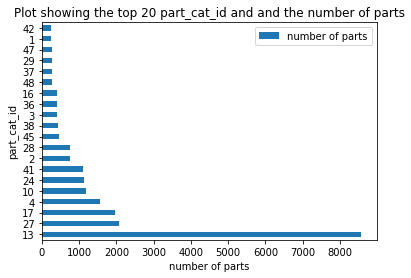

In [318]:
#this import is only to add an x axis label
import pylab as pl

#Group by 'part_cat_id', get the count of 'id's' per 'part_cat_id', sort them in decreasing order and get the top 20
res = parts.groupby(['part_cat_id'])['id'].count().sort_values(ascending=False).iloc[:20]

#Rename the column to 'number of parts'
new_res = res.to_frame('number of parts')

#Plot the graph
new_res.plot(kind = 'barh',title='Plot showing the top 20 part_cat_id and and the number of parts')
pl.xlabel('number of parts');

new_res.sort_values(by = 'number of parts', ascending=True)

*Querry 3*

This querry can be divided into two querries:
- 1) Find the most dominant color per sets
- 2) For each dominant colors plot the number of sets

*Part 1*

The technic here is to merge different data frames in order to obtain a dataframe with labels: set_id, inventory_id, color_id, quantity and color_name. Hence we will need to merge the following dataframes: sets, inventory_sets, inventory_parts and colors. We shall do it in the following order:
- 1) Merge sets with inventory_sets with set_id as the common label
- 2) Then merge the above resulting dataframe with inventory parts with inventory_id as the common label
- 3) Finally merge the above resulting dataframe with colors with color_id as the common label 

Afterwards you need to take the resulting dataframe and group by set_id and color name to obtain the quantity for each colors of each sets. Then from the dataframe we can sort the values according to quantity (ascending = False) and just select the top color which will be the most dominant color for that particular set.

In [319]:
# The first merge.
inventory_sets_parts = pd.merge(sets,inventory_sets,left_index=True,right_on='set_id')[['set_id','inventory_id']]

# The second merge
inventory_sets_parts_color = pd.merge(inventory_sets_parts,inventory_parts)

# Take appropriate columns (not all of them are useful).
inventory_sets_parts_color = inventory_sets_parts_color[['set_id','color_id','quantity']]

# Final merge.
inventory_sets_parts_color_name = pd.merge(inventory_sets_parts_color, colors,right_index=True,left_on='color_id')[['set_id','name','quantity']]

# Group by and sum in order to obtain the total quantities per colors per set.
inventory_sets_parts_color_name = inventory_sets_parts_color_name.groupby(['set_id','name']).sum()

# Sort the dataframe in order of decreasing quantities
inventory_sets_parts_color_name = inventory_sets_parts_color_name.reset_index().sort_values(['set_id','quantity'], ascending = [True,False]).set_index(['set_id'])

dominant_color = pd.DataFrame(columns=['set_id','color','quantity'])

# For loop necessary since while iterating over each indexes of set_id (hierachical indexes), some sets have only 1 color
# Which will be a single value and some sets will have multiple colors, which will be Series. So we created a new dataframe
# and 
for i in inventory_sets_parts_color_name.index.unique():
    the_colors_quantity = inventory_sets_parts_color_name.loc[i].quantity
    the_colors_name = inventory_sets_parts_color_name.loc[i]
    if isinstance(the_colors_quantity,pd.Series):
        df_to_append = pd.DataFrame(data = [[i,the_colors_name.name.iloc[0],the_colors_quantity.iloc[0]]],columns=['set_id','color','quantity'])
        dominant_color = pd.concat([dominant_color,df_to_append])
    else:
        df_to_append = pd.DataFrame(data = [[i,the_colors_name[0],the_colors_quantity]],columns=['set_id','color','quantity'])
        dominant_color = pd.concat([dominant_color,df_to_append])


    
dominant_color_per_set_id = dominant_color.set_index('set_id')

# Remove sets with dominant color quantity = 0, which means that the set has no dominant color.
dominant_color_per_set_id = dominant_color_per_set_id.drop(dominant_color_per_set_id[dominant_color_per_set_id.quantity == 0.0].index)

# Sort by quantities
dominant_color_per_set_id = dominant_color_per_set_id.sort_values(by='quantity',ascending = False)

dominant_color_per_set_id


,color,quantity
set_id,,
pk1062,White,62
1062-1,White,62
k1062b,White,62
1064-1,White,62
4548-1,Dark Bluish Gray,16
10173-1,Dark Bluish Gray,16
9767-1,[No Color],9
9750-1,[No Color],9
9700-1,[No Color],9


*Part 2*

For this querry, a lot of the work is already done in the previous part. So we can first get the list of dominant colors. Then the following merges:
- 1) Merge with the dataframe from part 1 above
- 2) From the merged dataframe, group by the color name and sum to obtain the number of sets per dominant colors
- 3) Merge the above resulting dataset with colors in order to obtain the rgb value for each color.
- 4) Plot the graph.

,hex,number of sets
color name,,
Royal Blue,#4C61DB,47
Black,#05131D,44
[No Color],#05131D,40
Green,#237841,10
White,#FFFFFF,7
Flat Dark Gold,#B48455,6
Dark Bluish Gray,#6C6E68,4
Red,#C91A09,4
Light Bluish Gray,#A0A5A9,3


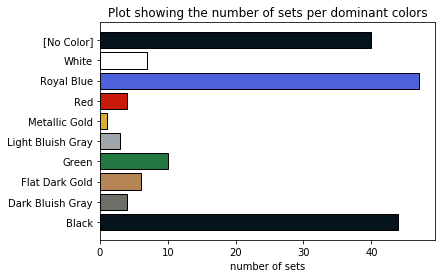

In [320]:
# necessary for x axis label
import pylab as pl

# Get the list of dominant colors (no duplicates) and convert to dataframe
all_dominant_colors = dominant_color_per_set_id['color'].unique()
all_dominant_colors = pd.DataFrame(all_dominant_colors,columns=['color name'])

# First merge with group by and sum
sets_per_colors = pd.merge(all_dominant_colors,inventory_sets_parts_color_name.reset_index(),left_on='color name',right_on='name')[['color name','set_id']].groupby('color name').count()

# Rename column for consistency
sets_per_colors.columns = ['number of sets']

# Sort by decreasing number of sets
sets_per_colors = sets_per_colors.sort_values(by='number of sets', ascending = False)
sets_per_colors

# Get the rgb value for each color, will be necessary for plot (In fact rgb code is hex code)
sets_per_colors_rgb = pd.merge(sets_per_colors,colors,left_index=True, right_on='name')[['name','rgb','number of sets']]
sets_per_colors_rgb.columns = ['color name', 'hex', 'number of sets']
sets_per_colors_rgb = sets_per_colors_rgb.set_index('color name')

# Give the rgb (hex format) the correct format
sets_per_colors_rgb.hex = sets_per_colors_rgb.hex.apply(lambda x: '#'+x)

# Plot graph
plt.barh(sets_per_colors_rgb.index, sets_per_colors_rgb['number of sets'], color = sets_per_colors_rgb.hex.tolist(), edgecolor = 'black')
pl.title('Plot showing the number of sets per dominant colors')
pl.xlabel('number of sets')

sets_per_colors_rgb

*Querry 4*

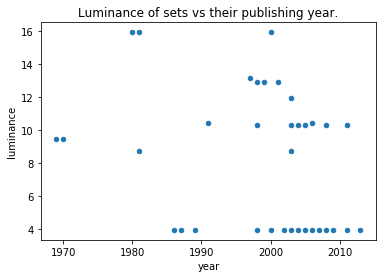

In [321]:
#To conver hex to rgb
import webcolors

# First merge with colors to get the hex format (rgb label)
df = pd.merge(dominant_color_per_set_id.reset_index(), colors, left_on='color', right_on='name')[['set_id','color','rgb']]

# Second merge to get the publishing years
df = pd.merge(df,sets,left_on='set_id', right_index=True)[['set_id','color','rgb','year']]

# Convert hex formated colors to luminances via rgb format
df.rgb = df.rgb.apply(lambda x: webcolors.hex_to_rgb('#'+x))
df.rgb = df.rgb.apply(lambda x: np.sqrt(0.299*(x[0]^2) + 0.587*(x[1]^2) + 0.114*(x[2]^2)))

# Rename columns for consistency.
df.columns = ['set_id','color','luminance','year']

df = df[['luminance','year']]
df = df.drop_duplicates()

# Convert datetime years to int for plot.
df.year = df.year.apply(lambda x: int(x.year))

# Plot 
df.plot(kind='scatter',x='year',y='luminance', title = 'Luminance of sets vs their publishing year.')

We can clearly see that as the years progress, luminance makes jumps. Over the last years, luminance was very low then very high.

In [322]:
inventory_parts

,inventory_id,part_id,color_id,quantity,is_spare
0,1,48379c01,72,1,f
1,1,48395,7,1,f
2,1,mcsport6,25,1,f
3,1,paddle,0,1,f
4,3,11816pr0005,78,1,f
5,3,2343,47,1,f
6,3,3003,29,1,f
7,3,30176,2,1,f
8,3,3020,15,1,f
9,3,3022,15,0,f


__\* Briefly explain your approach for every query here \*__

## Task B. Drop the bike

*Los Angeles Metro* has been sharing publicly [anonymized *Metro Bike Share* trip data](https://bikeshare.metro.net/about/data/) under the [Open Database License (ODbL)](http://opendatacommons.org/licenses/odbl/1.0/).

In this task you will again perform data wrangling and interpretation.

### B1. Loading phase
Load the json file into a `DataFrame`.


In [323]:
BIKES_DATA_FOLDER = DATA_FOLDER + '/bikes'

In [324]:
# Write your code here
bikes = pd.read_json(BIKES_DATA_FOLDER + "/metro-bike-share-trip-data.json.zip")
bikes.head(20)

,Bike ID,Duration,End Time,Ending Station ID,Ending Station Latitude,Ending Station Longitude,Passholder Type,Plan Duration,Start Time,Starting Station ID,Starting Station Latitude,Starting Station Longitude,Trip ID,Trip Route Category
0,6281.0,180,2016-07-07T04:20:00,3014.0,34.056610,-118.23721,Monthly Pass,30.0,2016-07-07T04:17:00,3014.0,34.056610,-118.23721,1912818,Round Trip
1,6281.0,1980,2016-07-07T06:33:00,3014.0,34.056610,-118.23721,Monthly Pass,30.0,2016-07-07T06:00:00,3014.0,34.056610,-118.23721,1919661,Round Trip
2,5861.0,300,2016-07-07T10:37:00,3016.0,34.052898,-118.24156,Flex Pass,365.0,2016-07-07T10:32:00,3016.0,34.052898,-118.24156,1933383,Round Trip
3,5861.0,10860,2016-07-07T13:38:00,3016.0,34.052898,-118.24156,Flex Pass,365.0,2016-07-07T10:37:00,3016.0,34.052898,-118.24156,1944197,Round Trip
4,6674.0,420,2016-07-07T12:58:00,3032.0,34.049889,-118.25588,Walk-up,0.0,2016-07-07T12:51:00,3032.0,34.049889,-118.25588,1940317,Round Trip
5,6717.0,780,2016-07-07T13:04:00,3054.0,34.039219,-118.23649,Monthly Pass,30.0,2016-07-07T12:51:00,3021.0,34.045609,-118.23703,1944075,One Way
6,5721.0,600,2016-07-07T13:04:00,3014.0,34.056610,-118.23721,Monthly Pass,30.0,2016-07-07T12:54:00,3022.0,34.046070,-118.23309,1944073,One Way
7,5957.0,600,2016-07-07T13:09:00,3005.0,34.048550,-118.25905,Flex Pass,365.0,2016-07-07T12:59:00,3076.0,34.040600,-118.25384,1944067,One Way
8,6137.0,2880,2016-07-07T13:49:00,3031.0,34.044701,-118.25244,Flex Pass,365.0,2016-07-07T13:01:00,3031.0,34.044701,-118.25244,1944062,Round Trip
9,6351.0,960,2016-07-07T13:17:00,3078.0,34.064281,-118.23894,Monthly Pass,30.0,2016-07-07T13:01:00,3031.0,34.044701,-118.25244,1944063,One Way


### B2. Cleaning phase
Describe the type and the value range of each attribute. Indicate and transform the attributes that are `Categorical`. Are there redundant columns in the dataset (i.e., are there columns whose value depends only on the value of another column)? What are the possible pitfalls of having such columns? Reduce *data redundancy* by extracting such columns to separate `DataFrames`. Which of the two formats (the initial one or the one with reduced data redundancy) is more susceptible to inconsistencies? At the end print for each `Dataframe` the *type of each column* and it's *shape*.

In [325]:
# Write your code here

__\* Briefly explain your approach here \*__

### B3. Querying phase
Answer the following queries using the functionality of `Pandas`.

1. Plot the *distribution* of the number of outgoing trips from each station in a histogram with 20 bins (Hint: each bin describes a range of counts, not stations).
* Plot histograms for the *duration* and *trip starting hour in the day* attributes. For both the *duration*  and the *trip starting hour* use *discrete 1-hour intervals*. What do you observe in each plot? What are some popular values in the *duration* plot? Explain the local maxima and the trends you observe on the *trip starting hour* plot based on human behavior.
* For each *trip route category*, calculate the proportion of trips by *passholder type* and present your results in *a stacked bar chart with normalized height*.
* Considering only trips that begin in the morning hours (before noon), plot in *a single bar chart* the proportion of trips by *passholder type* and *trip route category*. Explain any outliers you observe.
* Separate the hours of the day into two intervals that have (approximately) the same number of bikes leaving the stations. For each of the two intervals calculate the proportion of trips by *passholder type* and *trip route category*. Present your results in a `DataFrame` which has a unique, non-composite index. Does the proportion of trips depend on whether it is the first or second hour interval? Would the company have any significant benefit by creating a more complex paying scheme where monthly pass users would pay less in the first interval and (equally) more on the second one? Assume that the number of trips per interval will not change if the scheme changes.

In [326]:
# Write your code here

__\* Briefly explain your approach for every query here \*__